<div class="alert alert-block alert-info"><h1>ETL: Bitcoin vs MXN Peso<h1/><div/>

In [2]:
import pandas as pd
from sqlalchemy import create_engine

In [37]:
import numpy as np
import requests

# Extract API/CSV into Data Frames

In [4]:
# We used a csv file if API connection failed
# bitcoin_file = "/Users/roas/Desktop/ETL_project/resources/bitcoin_dataset.csv"

In [62]:
# tcp_dollar_peso_file = '/Users/roas/Desktop/ETL_project/resources/tpc_11_19.csv'

In [6]:
# bitcoin_df = pd.read_csv(bitcoin_file)

In [63]:
# tcp_df = pd.read_csv(tcp_dollar_peso_file)

<div class="alert alert-block  alert-danger"><b>API connection to Kaggle<b/><div/>

In [147]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi({"username":"luisdiaz9","key":"683a230e5ecead1e22bb67219591de1e"})
api.authenticate()
files = api.dataset_download_files('sudalairajkumar/cryptocurrencypricehistory')
#kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

In [148]:
import kaggle as kg
kg.api.authenticate()
kg.api.dataset_download_files(dataset="sudalairajkumar/cryptocurrencypricehistory", unzip=False)

import pandas as pd
import zipfile

zf = zipfile.ZipFile('cryptocurrencypricehistory.zip') 
bitcoin_df = pd.read_csv(zf.open('bitcoin_dataset.csv'))

#df= df.set_index('Date')

In [149]:
bitcoin_df.head(2)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0


In [150]:
bitcoin_df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

<div class="alert alert-block  alert-danger"><b>Api to get TCP from Banxico<b/><div/>

In [179]:
token = 'f384d37a2819d8728a7275ca35b7d390cbc1a5fb4d28c5695603491168ac032f';
start_date = '2010-02-23'
end_date = '2019-07-31'
catalog = 'SF43786'

In [180]:
query1 = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{catalog}/datos/{start_date}/{end_date}?token={token}';
query1

'https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF43786/datos/2010-02-23/2019-07-31?token=f384d37a2819d8728a7275ca35b7d390cbc1a5fb4d28c5695603491168ac032f'

In [181]:
tcp_info_json = requests.get(query1).json()

In [241]:
tcp_info_json['bmx']['series'][0]['datos']

[{'fecha': '23/02/2010', 'dato': '12.8990'},
 {'fecha': '24/02/2010', 'dato': '12.8497'},
 {'fecha': '25/02/2010', 'dato': '12.8275'},
 {'fecha': '26/02/2010', 'dato': '12.7790'},
 {'fecha': '01/03/2010', 'dato': '12.7410'},
 {'fecha': '02/03/2010', 'dato': '12.7430'},
 {'fecha': '03/03/2010', 'dato': '12.7070'},
 {'fecha': '04/03/2010', 'dato': '12.7070'},
 {'fecha': '05/03/2010', 'dato': '12.6640'},
 {'fecha': '08/03/2010', 'dato': '12.6670'},
 {'fecha': '09/03/2010', 'dato': '12.6315'},
 {'fecha': '10/03/2010', 'dato': '12.6100'},
 {'fecha': '11/03/2010', 'dato': '12.5945'},
 {'fecha': '12/03/2010', 'dato': '12.5400'},
 {'fecha': '16/03/2010', 'dato': '12.5285'},
 {'fecha': '17/03/2010', 'dato': '12.4500'},
 {'fecha': '18/03/2010', 'dato': '12.5050'},
 {'fecha': '19/03/2010', 'dato': '12.5690'},
 {'fecha': '22/03/2010', 'dato': '12.5485'},
 {'fecha': '23/03/2010', 'dato': '12.4925'},
 {'fecha': '24/03/2010', 'dato': '12.5810'},
 {'fecha': '25/03/2010', 'dato': '12.5230'},
 {'fecha':

In [183]:
len(tcp_info_json['bmx']['series'][0]['datos'])

2374

In [262]:
date, dolar = [], [] 

for n in range(len(tcp_info_json['bmx']['series'][0]['datos'])):
    date.append(tcp_info_json['bmx']['series'][0]['datos'][n]['fecha'])
    dolar.append(tcp_info_json['bmx']['series'][0]['datos'][n]['dato'])

zippedList =  list(zip(date, dolar))
tcp_df = pd.DataFrame(zippedList, columns = ['date' , 'dolar']).dropna(how='any')

In [263]:
tcp_df.head(2)

,date,dolar
0,23/02/2010,12.8990
1,24/02/2010,12.8497


In [264]:
tcp_df.tail(2)

,date,dolar
2372,30/07/2019,19.0635
2373,31/07/2019,19.0000


# Transform Data

Columns used in __Bitcoin__ table: Date, btc_market_price, btc_total_bitcoins, btc_cost_per_transaction_percent, btc_n_transactions_total

In [196]:
new_bitcoin_df = bitcoin_df.copy()

In [197]:
columns_remove = [ 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees','btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume']

In [198]:
new_bitcoin_df.drop(columns_remove, axis = 1, inplace = True)

In [282]:
new_bitcoin_df.columns

Index(['btc_market_price', 'btc_total_bitcoins',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_transactions_total', 'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [283]:
new_bitcoin_df.dtypes

btc_market_price                        float64
btc_total_bitcoins                      float64
btc_cost_per_transaction_percent        float64
btc_cost_per_transaction                float64
btc_n_transactions_total                float64
btc_estimated_transaction_volume_usd    float64
dtype: object

In [201]:
# Transform the Date column into Date data type
new_bitcoin_df['Date'] = pd.to_datetime(new_bitcoin_df['Date'])

In [202]:
new_bitcoin_df.dtypes

Date                                    datetime64[ns]
btc_market_price                               float64
btc_total_bitcoins                             float64
btc_cost_per_transaction_percent               float64
btc_cost_per_transaction                       float64
btc_n_transactions_total                       float64
btc_estimated_transaction_volume_usd           float64
dtype: object

In [203]:
new_bitcoin_df['Date'].min()

Timestamp('2010-02-23 00:00:00')

In [204]:
new_bitcoin_df['Date'].max()

Timestamp('2018-02-20 00:00:00')

In [284]:
new_bitcoin_df.count()

btc_market_price                        2920
btc_total_bitcoins                      2920
btc_cost_per_transaction_percent        2920
btc_cost_per_transaction                2920
btc_n_transactions_total                2920
btc_estimated_transaction_volume_usd    2920
dtype: int64

### Review TCP Data Frame to leave it with the same period of time

In [265]:
tcp_df.dtypes

date     object
dolar    object
dtype: object

In [266]:
tcp_df['date'] = pd.to_datetime(tcp_df['date'], format="%d/%m/%Y")

In [267]:
tcp_df['dolar'] = pd.to_numeric(tcp_df['dolar'], errors='coerce')

In [268]:
tcp_df.dtypes

date     datetime64[ns]
dolar           float64
dtype: object

In [269]:
tcp_df['date'].min()

Timestamp('2010-02-23 00:00:00')

In [270]:
tcp_df['date'].max()

Timestamp('2019-07-31 00:00:00')

### The dates while start at 2010-02-23 and will end 2018-02-20 for both datasets

In [221]:
new_bitcoin_df.set_index('date', inplace=True)

In [222]:
new_bitcoin_df.head(1)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-23,0.0,2110700.0,25100.0,0.0,42613.0,0.0


In [223]:
bitcoin_db = new_bitcoin_df.loc['2010-02-23':'2018-02-20'].copy()
bitcoin_db

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-23,0.000000,2110700.0,25100.000000,0.000000,42613.0,0.000000e+00
2010-02-24,0.000000,2120200.0,179.245283,0.000000,42809.0,0.000000e+00
2010-02-25,0.000000,2127600.0,1057.142857,0.000000,42959.0,0.000000e+00
2010-02-26,0.000000,2136100.0,64.582059,0.000000,43135.0,0.000000e+00
2010-02-27,0.000000,2144750.0,1922.222222,0.000000,43311.0,0.000000e+00
2010-02-28,0.000000,2152850.0,154.285714,0.000000,43476.0,0.000000e+00
2010-03-01,0.000000,2162150.0,930.000000,0.000000,43663.0,0.000000e+00
2010-03-02,0.000000,2171950.0,376.923077,0.000000,43867.0,0.000000e+00
2010-03-03,0.000000,2179350.0,2960.000000,0.000000,44018.0,0.000000e+00


In [274]:
# Now review the TCP index
tcp_df.set_index('date',inplace = True)

In [275]:
tcp_df.(5)

,dolar
date,
2010-02-23,12.8990
2010-02-24,12.8497
2010-02-25,12.8275
2010-02-26,12.7790
2010-03-01,12.7410


In [277]:
tcp_db = tcp_df.loc['2010-02-23':'2018-02-20'].copy()

In [278]:
tcp_db.head(1)

,dolar
date,
2010-02-23,12.899


In [279]:
tcp_db.tail(1)

,dolar
date,
2018-02-20,18.7195


In [280]:
tcp_db.count()

dolar    2012
dtype: int64

#### To create a similar period of measurement, we will need to resample both data sets. 

In [285]:
bitcoin_db = bitcoin_db.resample(rule='W').mean()
bitcoin_db.head(5)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd
Date,,,,,,
2010-02-28,0.0,2.132033e+06,4746.246356,0.0,43050.500000,0.0
2010-03-07,0.0,2.188636e+06,650.593700,0.0,44208.000000,0.0
2010-03-14,0.0,2.243314e+06,594.100431,0.0,45329.142857,0.0
2010-03-21,0.0,2.291779e+06,13934.745851,0.0,46327.000000,0.0
2010-03-28,0.0,2.353514e+06,343.695930,0.0,47631.000000,0.0


In [286]:
bitcoin_db.count()

btc_market_price                        418
btc_total_bitcoins                      418
btc_cost_per_transaction_percent        418
btc_cost_per_transaction                418
btc_n_transactions_total                418
btc_estimated_transaction_volume_usd    418
dtype: int64

In [287]:
tcp_db = tcp_db.resample(rule = 'W').mean()

In [288]:
tcp_db.head(5)

,dolar
date,
2010-02-28,12.838800
2010-03-07,12.712400
2010-03-14,12.608600
2010-03-21,12.513125
2010-03-28,12.535000


In [289]:
tcp_db.count()

dolar    418
dtype: int64

In [290]:
tcp_db.head(5)

,dolar
date,
2010-02-28,12.838800
2010-03-07,12.712400
2010-03-14,12.608600
2010-03-21,12.513125
2010-03-28,12.535000


In [115]:
bitcoin_db.head(1)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id
Date,,,,,,,
2011-01-02,0.299996,5036250.0,54.382899,4.553059,219086.0,4965.0,1


In [116]:
bitcoin_db.rename_axis('date', inplace=True)

### With the same period, we can compare the trend of both data sets

In [291]:
tcp_db['id'] = np.arange(1,len(tcp_db)+1)

In [292]:
tcp_db.head(3)

,dolar,id
date,,
2010-02-28,12.8388,1
2010-03-07,12.7124,2
2010-03-14,12.6086,3


In [293]:
bitcoin_db['id'] = np.arange(1,len(bitcoin_db)+1)

In [294]:
bitcoin_db['id'].head(3)

Date
2010-02-28    1
2010-03-07    2
2010-03-14    3
Freq: W-SUN, Name: id, dtype: int64

In [295]:
bitcoin_db.head(2)

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id
Date,,,,,,,
2010-02-28,0.0,2.132033e+06,4746.246356,0.0,43050.5,0.0,1
2010-03-07,0.0,2.188636e+06,650.593700,0.0,44208.0,0.0,2


In [296]:
bitcoin_db['date'] = bitcoin_db.index

In [297]:
tcp_db['date'] = tcp_db.index

# Create database connection

In [298]:
rds_conn = "postgres:adriana@localhost:5432/bitcoin_db"
engine = create_engine(f'postgresql://{rds_conn}')

In [299]:
engine.table_names()

['tcp', 'bitcoin']

In [300]:
bitcoin_db.to_sql(name='bitcoin', con=engine, if_exists='append', index=False)

In [301]:
pd.read_sql_query('SELECT * FROM bitcoin', con = engine).head(3)

,date,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,id
0,2011-01-02,0.299996,5.036250e+06,54.382899,4.553059,219086.000000,4965.000000,1
1,2011-01-09,0.309399,5.067007e+06,41.797444,2.283450,223286.000000,6147.285714,2
2,2011-01-16,0.380429,5.124764e+06,28.004795,2.794146,231698.428571,14005.142857,3


In [184]:
tcp_db.to_sql(name='tcp', con=engine, if_exists='append', index=False)

In [302]:
pd.read_sql_query('SELECT * FROM tcp', con = engine).head(2)

,date,dolar,id
0,2011-01-02,12.0170,1
1,2011-01-09,11.8686,2


In [303]:
bit_dolar_DF=pd.merge(bitcoin_db,tcp_db,on='id', how='inner').dropna(how='any')

bit_dolar_DF.set_index('id', inplace=True)
# por si es necesario borrar columna..
del bit_dolar_DF['date_y']

In [305]:
bit_dolar_DF

,btc_market_price,btc_total_bitcoins,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_transactions_total,btc_estimated_transaction_volume_usd,date_x,dolar
id,,,,,,,,
1,0.000000,2.132033e+06,4746.246356,0.000000,4.305050e+04,0.000000e+00,2010-02-28,12.838800
2,0.000000,2.188636e+06,650.593700,0.000000,4.420800e+04,0.000000e+00,2010-03-07,12.712400
3,0.000000,2.243314e+06,594.100431,0.000000,4.532914e+04,0.000000e+00,2010-03-14,12.608600
4,0.000000,2.291779e+06,13934.745851,0.000000,4.632700e+04,0.000000e+00,2010-03-21,12.513125
5,0.000000,2.353514e+06,343.695930,0.000000,4.763100e+04,0.000000e+00,2010-03-28,12.535000
6,0.000000,2.419714e+06,746.759173,0.000000,4.901757e+04,0.000000e+00,2010-04-04,12.398333
7,0.000000,2.481407e+06,182.660955,0.000000,5.035443e+04,0.000000e+00,2010-04-11,12.233400
8,0.000000,2.553421e+06,132.773983,0.000000,5.219957e+04,0.000000e+00,2010-04-18,12.200100
9,0.000000,2.625607e+06,143.780908,0.000000,5.684014e+04,0.000000e+00,2010-04-25,12.216220


<IPython.core.display.Javascript object>


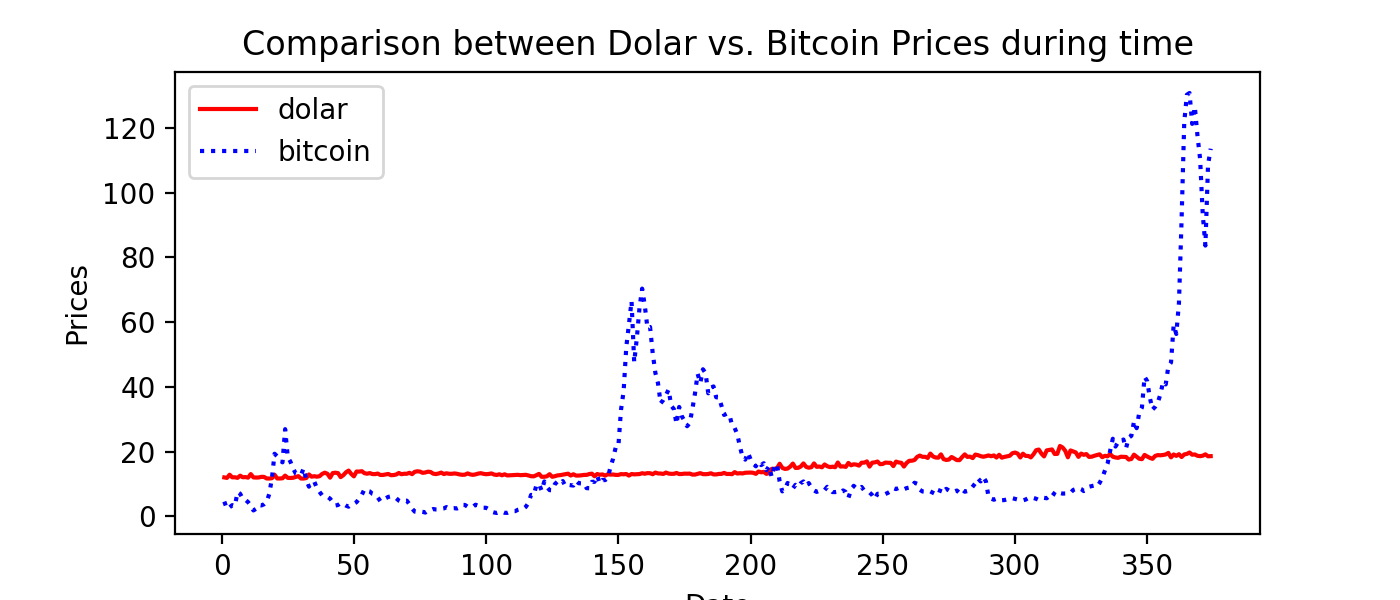

<IPython.core.display.Javascript object>


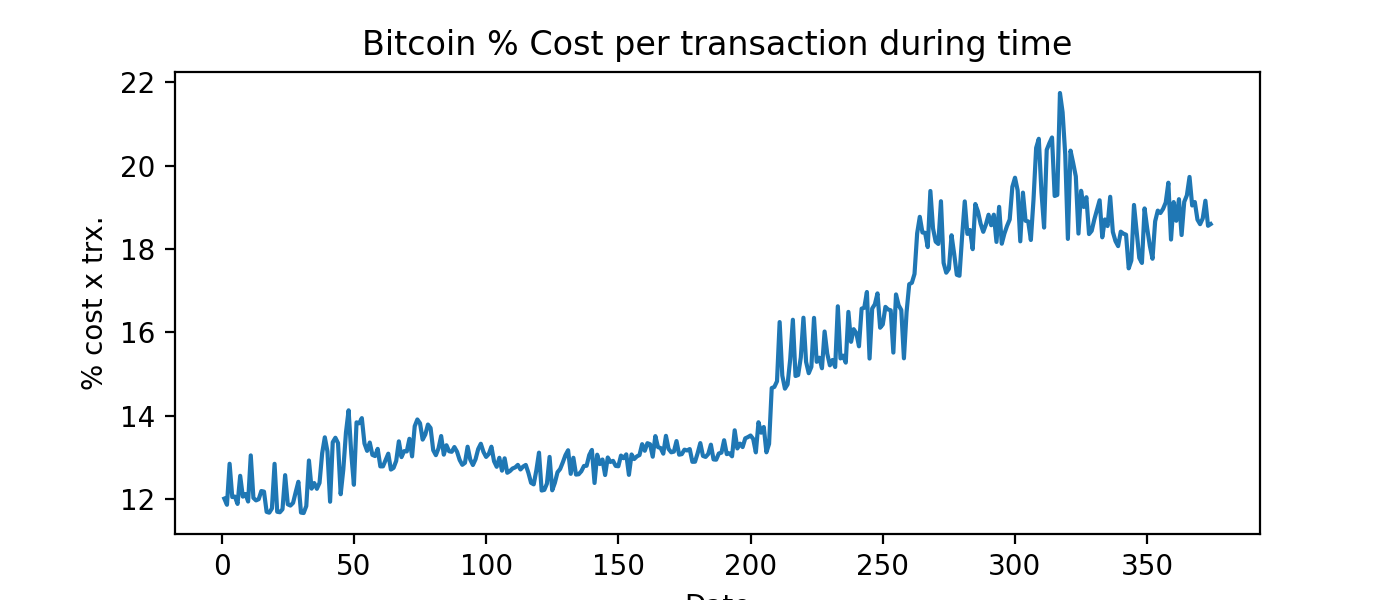

In [125]:
#plots
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Plot Prices
#data1
x = bit_dolar_DF.index.tolist()
#x = bit_dolar_DF.date
y = bit_dolar_DF.btc_cost_per_transaction
plt.figure(figsize=(7,3))
#data2
q = bit_dolar_DF.index.tolist()
#q = bit_dolar_DF.date
w = bit_dolar_DF.dolar
dolar=plt.plot(q, w, '-r')
bitcoin=plt.plot(x, y, ':b')
plt.title('Comparison between Dolar vs. Bitcoin Prices during time')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.legend(["dolar", "bitcoin"])

#Plot bit coin btc_cost_per_transaction_percent
plt.figure(figsize=(7,3))
x = bit_dolar_DF.index.tolist()
#x = bit_dolar_DF.date
y = bit_dolar_DF.btc_cost_per_transaction_percent
plt.plot(q, w, '-')
plt.title('Bitcoin % Cost per transaction during time')
plt.xlabel('Date')
plt.ylabel('% cost x trx.')

#obtain correlation
from scipy import stats
# Y and Z are numpy arrays or lists of variables
corr=stats.pearsonr(bit_dolar_DF.dolar,bit_dolar_DF.btc_cost_per_transaction)